#Chapter 11

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

#feature
print("feature")
print(iris.feature_names) # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#data
print("data")
print(iris.data)

#label
print("label")
print(iris.target) # 0 = setosa, 1=versicolor, 2=virginica

feature
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1

In [5]:
from sklearn.model_selection import train_test_split

X=iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=1)  
#knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)

print(scores)

0.9333333333333333


In [14]:
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 아직 보지 못한 새로운 데이터를 제시해보자. 
#x_new = [[3,4,5,2], [5,4,2,2]]
#x_new = [[5,2,3,4], [5,4,2,2]]
x_new = [[5,5,5,5], [1,1,1,1]]
y_predict = knn.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

virginica
setosa


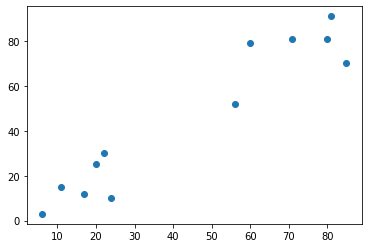

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([
[6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
[85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

plt.scatter(X[:,0],X[:,1])

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[72.16666667 75.66666667]
 [16.66666667 15.83333333]]


[1 1 1 1 1 1 0 0 0 0 0 0]


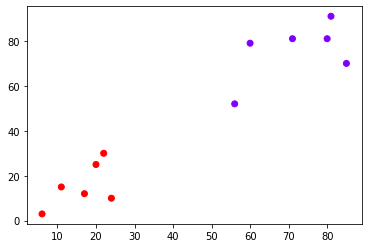

In [16]:
print(kmeans.labels_)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

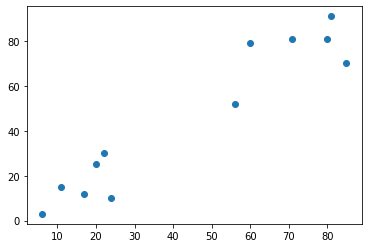

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([
[6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
[85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

#[6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
#[85,70], [71,81], [60,79], [56,52], [81,91], [80,81],
#[8,7],[1,8],[6,9],[6,5],[1,1],[8,1]])

plt.scatter(X[:,0],X[:,1])

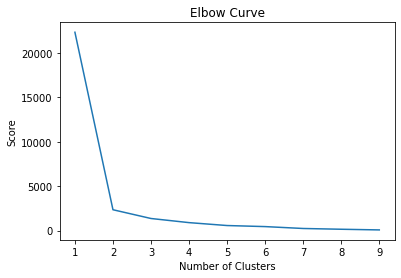

In [21]:

n_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in n_clusters]

# 모든 샘플에 대하여 제곱 오차를 계산하여 리스트에 추가한다. 
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

plt.plot(n_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#Chapter 12

In [ ]:
# 뉴론의 출력 계산 함수
def calculate(input):
    global weights
    global bias
    activation = bias		# 바이어스
    for i in range(2):		# 입력신호 총합 계산
        activation += weights[i] * input[i]
    if activation >= 0.0:	# 스텝 활성화 함수
        return 1.0 
    else:
        return 0.0
 
# 학습 알고리즘
def train_weights(X, y, l_rate, n_epoch):
    global weights
    global bias
    for epoch in range(n_epoch):		# 에포크 반복
        sum_error = 0.0
        for row, target in zip(X, y):		# 데이터셋을 반복
            actual = calculate(row)		# 실제 출력 계산
            error = target - actual		# 실제 출력 계산
            #bias = bias + l_rate * error
            bias = round(bias + l_rate * error,10)
            sum_error += error**2		# 오류의 제곱 계산
            for i in range(2):			# 가중치 변경
                weights[i] = weights[i] + l_rate * error * row[i]
            print(weights, bias)
        print('에포크 번호=%d, 학습률=%.3f, 오류=%.3f' % (epoch+1, l_rate, sum_error))
    return weights

# AND 연산 학습 데이터셋, 샘플과 레이블이다. 
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0, 0, 0, 1]

# 가중치와 바이어스 초기값
weights = [0.0, 0.0]
bias = 0.0

l_rate = 0.1		# 학습률	
n_epoch = 10		# 에포크 횟수
weights = train_weights(X, y, l_rate, n_epoch)
print(weights, bias)